Potofolio Pengolahan Data

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download latest version
path = kagglehub.dataset_download("adilshamim8/salaries-for-data-science-jobs")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\adilshamim8\salaries-for-data-science-jobs\versions\13


In [3]:
file_path = r"C:\Users\User\.cache\kagglehub\datasets\adilshamim8\salaries-for-data-science-jobs\versions\13\salaries.csv"

df = pd.read_csv(file_path)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Software Engineer,218900,USD,218900,US,100,US,M
1,2025,SE,FT,Software Engineer,186065,USD,186065,US,100,US,M
2,2025,SE,FT,System Engineer,158000,USD,158000,US,0,US,M
3,2025,SE,FT,System Engineer,140000,USD,140000,US,0,US,M
4,2025,SE,FT,Data Engineer,164600,USD,164600,US,0,US,M


In [9]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
148516,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
148517,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
148518,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
148519,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
148520,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148521 entries, 0 to 148520
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           148521 non-null  int64 
 1   experience_level    148521 non-null  object
 2   employment_type     148521 non-null  object
 3   job_title           148521 non-null  object
 4   salary              148521 non-null  int64 
 5   salary_currency     148521 non-null  object
 6   salary_in_usd       148521 non-null  int64 
 7   employee_residence  148521 non-null  object
 8   remote_ratio        148521 non-null  int64 
 9   company_location    148521 non-null  object
 10  company_size        148521 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.5+ MB


In [12]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,148521.000000,1.485210e+05,148521.000000,148521.000000
mean,2024.424196,1.628834e+05,157518.521125,20.881895
std,0.673689,2.092713e+05,74167.537288,40.578639
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105943.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [13]:
df.describe(include = object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,148521,148521,148521,148521,148521,148521,148521
unique,4,4,419,26,104,97,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,85846,147623,18503,140386,132900,132963,144447


In [8]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
sns.histplot(df['salary_in_usd'], bins=50, kde=True)

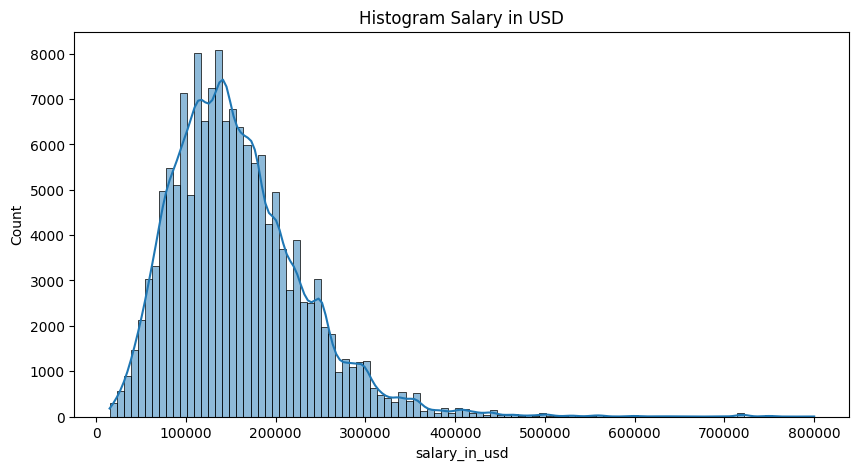

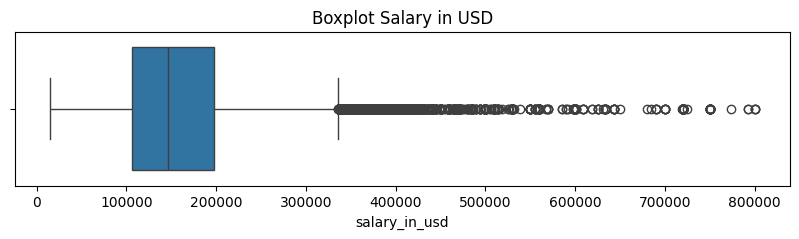

In [ ]:


plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], bins=100, kde=True)
plt.title('Histogram Salary in USD')
plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot Salary in USD')
plt.show()

<Axes: >

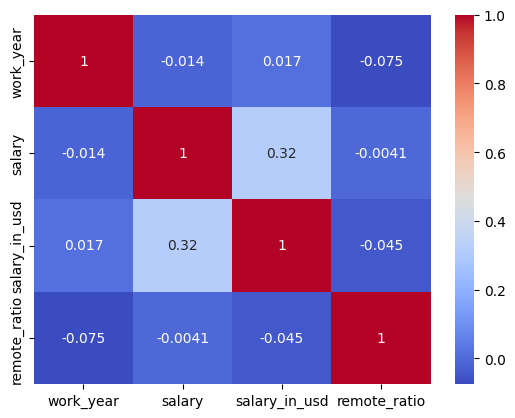

In [27]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [32]:
mean_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)


In [39]:
mean_salary

job_title
Research Team Lead               450000.000000
Analytics Engineering Manager    399880.000000
Data Science Tech Lead           375000.000000
Applied AI ML Lead               292500.000000
Head of Machine Learning         286805.736842
                                     ...      
Analytics Analyst                 24000.000000
QA Tutor Reviewer                 24000.000000
AI Engineering Lead               23649.000000
Alternance                        19825.000000
Quantitative Risk Analyst         18000.000000
Name: salary_in_usd, Length: 419, dtype: float64

In [40]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

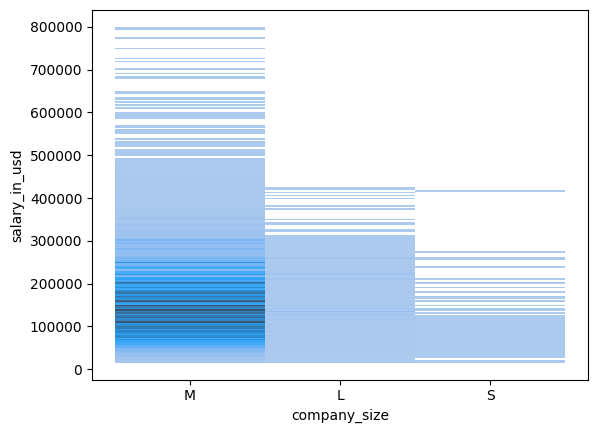

In [42]:
sns.histplot(x=df['company_size'], y=df['salary_in_usd'])

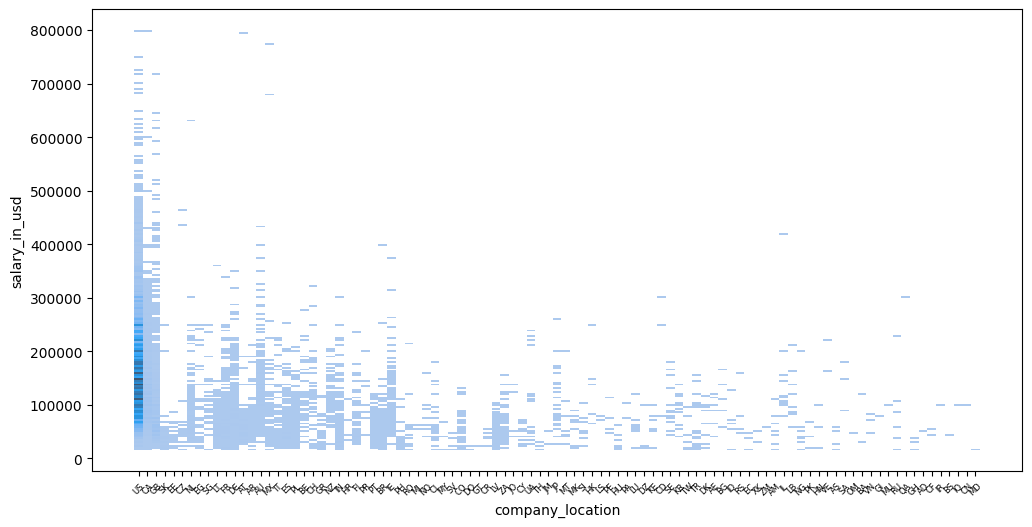

In [48]:
plt.figure(figsize=(12, 6))
sns.histplot(x=df['company_location'], y=df['salary_in_usd'])
plt.xticks(rotation=45, fontsize = 6)  # Rotate x-axis labels for better readability
plt.show()

In [49]:
df['company_location'].unique()

array(['US', 'CA', 'GB', 'SK', 'EE', 'CZ', 'NL', 'EG', 'SG', 'LT', 'FR',
       'DE', 'AT', 'AR', 'AU', 'MX', 'IT', 'ES', 'PL', 'BE', 'CH', 'GR',
       'NZ', 'IN', 'HR', 'FI', 'PR', 'PT', 'BR', 'IE', 'PH', 'RO', 'ML',
       'NO', 'CL', 'MY', 'SV', 'CO', 'DO', 'GT', 'CR', 'LV', 'ZA', 'JO',
       'CY', 'UA', 'TH', 'JM', 'JP', 'MT', 'MK', 'SI', 'HK', 'LS', 'PE',
       'HU', 'PA', 'LU', 'DZ', 'KE', 'CD', 'SE', 'KR', 'TW', 'TR', 'DK',
       'AE', 'BG', 'ID', 'RS', 'EC', 'XK', 'ZM', 'AM', 'IL', 'LB', 'NG',
       'PK', 'HN', 'VE', 'AS', 'SA', 'OM', 'BA', 'VN', 'GI', 'MU', 'RU',
       'QA', 'GH', 'AD', 'CF', 'IR', 'BS', 'IQ', 'CN', 'MD'], dtype=object)